# Predict default of creditcard payments
---------------------
### Introduction
This binary classification studies the case of customers default payments in Taiwan. We get to study different aspects of customers like Gender, Education, Marital Status, Age, Payment history, Credit taken, etc., to determine if they are going to default payment in the next month.

It will be interesting to understand which factors will have an impact on duly making or missing payments.

This [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/) is downloaded from UCI Machine Learning and more information on the data and the variables are found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

### Aim
This research is aimed to compares the predictive accuracy of probability of default among bellow different data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable. Hence we compare results from different models and choose the one with highest accuracy.

- kNN
- Logistic Regression
- Decision Tree
- Ensembles: Random Forest
- Support Vector Machines
- Artificial Neural Networks

In [51]:
#Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import recall_score, precision_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


#settings
%matplotlib inline

pd.options.display.max_columns = 30

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [8]:
#load data
raw_data = pd.read_excel("default of credit card clients.xls", header=1)

#drop ID column and reset column names
raw_data = raw_data.drop('ID', axis=1)
raw_data.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                    'default payment next month']
print("Shape of the data:",raw_data.shape)
raw_data.head()

Shape of the data: (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


The dataset contains data on 30000 customers with 23 explanatory variables and 1 response variable. Brief information on these below.

- X1: **Limit_Bal** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: **Sex** Gender (1 = male; 2 = female).
- X3: **Education** (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: **Marriage** Marital status (1 = married; 2 = single; 3 = others).
- X5: **Age** (year).
- X6 - X11: History of past payment. Past monthly payment records (from April to September, 2005) as follows: 
    - X6 = **PAY_1** the repayment status in September, 2005; 
    - X7 = **PAY_2** the repayment status in August, 2005; . . .;
    - X11 = **PAY_6** the repayment status in April, 2005. 
    The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = **BILL_AMT1** amount of bill statement in September, 2005; 
    - X13 = **BILL_AMT2** amount of bill statement in August, 2005; . . .; 
    - X17 = **BILL_AMT6** amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = **PAY_AMT1** amount paid in September, 2005; 
    - X19 = **PAY_AMT2** amount paid in August, 2005; . . .;
    - X23 = **PAY_AMT6** amount paid in April, 2005.
- Y: **default payment next month** (Yes = 1, No = 0)

-------------------------
## Data Exploration

- Check for null values
- Study distribution of the variables
- Study correlation

In [9]:
#check for null values
raw_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

We don't have any null values which is good. 
Let's visualize distribution of below 4 variables as other variables are either simillar to these or categorical. Studying these will give us an overview.
- LIMIT_BAL, AGE, BILL_AMT1, PAY_AMT1

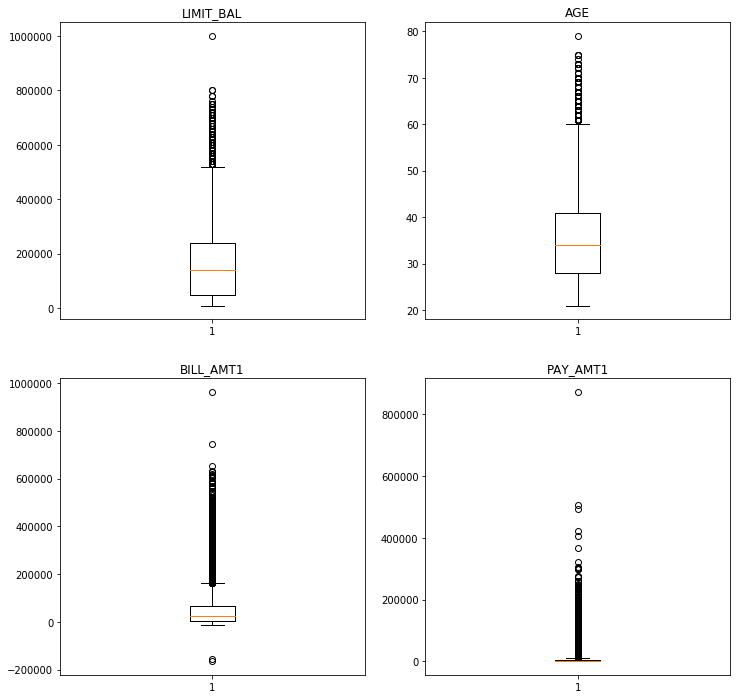

In [10]:
#plot distributions
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))

ax1.boxplot(raw_data['LIMIT_BAL'])
ax1.set_title('LIMIT_BAL')
ax2.boxplot(raw_data['AGE'])
ax2.set_title('AGE')
ax3.boxplot(raw_data['BILL_AMT1'])
ax3.set_title('BILL_AMT1')
ax4.boxplot(raw_data['PAY_AMT1'])
ax4.set_title('PAY_AMT1')
plt.show()

There are a good number of outliers in each of our variables visualized above. To reduce their affect we can use **RobustScaler** to scale the data. This method will still keep the outliers but their influence on the data would be minimal.

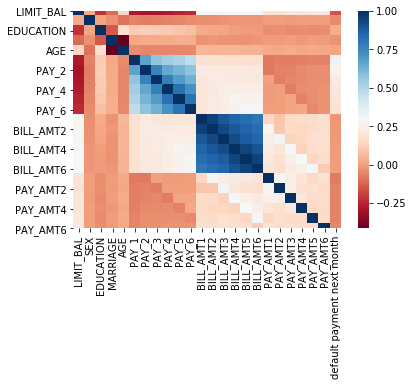

In [11]:
#correlation heatmap
sns.heatmap(raw_data.corr(), cmap='RdBu')

Few observations that we can make from above plot
- 'Past payments' seems to be only variables that are moderately highly correlated with 'default payment'
- followed by past bill amounts.
- also we don't find higly correlated independent variables though we can see some positive relation between 'bill amount' and 'pay amount' columns as well as 'past payments' and 'bill amount'.

-----------------------
## Preprocessing - Feature selection, One-hot encoding & Scaling Data
- Split data into train and test sets
- Perform Model-Based (RandomForest) feature selection to find important featuers
- Subset data with selected featuers
- Convert categorical variables using one-hot encoding.
- Scale data using RobustScaler

In [14]:
#split data into train and test
feature_cols = list(raw_data.columns[raw_data.columns != 'default payment next month'])
target_col = 'default payment next month'

X_train, X_test, y_train, y_test = train_test_split(raw_data[feature_cols], 
                                                    raw_data[target_col],
                                                    random_state=2, train_size=0.8)

print("Training set with 80% data for training and validation:",X_train.shape)
print("Value counts in Training target column")
print(y_train.value_counts(normalize=True)*100)
print("Test set with 20% data for testing:",X_test.shape)
print("Value counts in Test target column")
print(y_test.value_counts(normalize=True)*100)

Training set with 80% data for training and validation: (24000, 23)
Value counts in Training target column
0    77.9125
1    22.0875
Name: default payment next month, dtype: float64
Test set with 20% data for testing: (6000, 23)
Value counts in Test target column
0    77.75
1    22.25
Name: default payment next month, dtype: float64


In [15]:
#Feature importance
feature_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-2)
feature_model.fit(X_train, y_train)

feature_imp_df = pd.DataFrame({'col': X_train.columns,'imp' : feature_model.feature_importances_})
feature_imp_df = feature_imp_df.sort_values('imp', ascending=False)
feature_imp_df

,col,imp
5,PAY_1,0.099624
4,AGE,0.066643
11,BILL_AMT1,0.060810
0,LIMIT_BAL,0.059682
12,BILL_AMT2,0.055852
13,BILL_AMT3,0.051805
16,BILL_AMT6,0.050957
14,BILL_AMT4,0.050463
15,BILL_AMT5,0.049798
17,PAY_AMT1,0.049179


The above table show the importance of each feature sorted descendingly. We can see the most significant factor in predicting default of next month payment is previous months payment status. Surprisingly, AGE made it to second in the list which is interesting. But intuitively the next important features are LIMIT_BAL, BILL_AMT1, BILL_AMT2 and PAY_AMT1. The feature importance given by the model makes logical sense as the features we just described are in general the deciding factors in the ability of one making a payment.

Based on this, we shall choose the those features with value greater than 0.04. So, we have reduced number of features from 23 to 16.

In [16]:
#subset train and test sets
new_features = list(feature_imp_df[feature_imp_df['imp']>0.04]['col'])

X_train_new = X_train[new_features]
X_test_new = X_test[new_features]

Of the new features we have 2 categorical variables and rest are numerical. Let's do dummy coding for those features and scale rest of features.

In [17]:
#one-hot encoding
categorical_vars = ['PAY_1', 'PAY_2']
X_train_dummy = pd.get_dummies(X_train_new[categorical_vars], columns=categorical_vars, drop_first=True)
X_test_dummy = pd.get_dummies(X_test_new[categorical_vars], columns=categorical_vars, drop_first=True)

print(X_train_dummy.shape)
print(X_test_dummy.shape)

#drop original columns
X_train_new = X_train_new.drop(categorical_vars, axis=1)
X_test_new = X_test_new.drop(categorical_vars, axis=1)
#data_transformed = pd.concat([data_dummies, data_transformed], axis=1)

(24000, 20)
(6000, 19)


The reason we have different number of columns is that there is only one record with value "8" in the column **PAY_2**. It will either fall in test or train randomly, train in our case. So let's add an additional column to test which says **PAY_2_8** filling it with all zeros.

In [18]:
X_test_dummy['PAY_2_8'] = 0

#convert dummy dataframes to numpy
X_train_dummy = X_train_dummy.to_numpy()
X_test_dummy = X_test_dummy.to_numpy()

In [19]:
#scale continuous data using RobustScaler
continuous_vars = ['AGE', 'BILL_AMT1', 'LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT6', 'BILL_AMT4',
                   'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT6', 'PAY_AMT3', 'PAY_AMT5', 'PAY_AMT4']

scaler = RobustScaler()
scaler.fit(X_train_new[continuous_vars])
X_train_scaled = scaler.transform(X_train_new[continuous_vars])
X_test_scaled = scaler.transform(X_test_new[continuous_vars])

#combine scaled and dummy sets
X_train_complete = np.concatenate((X_train_scaled, X_train_dummy), axis=1)
X_test_complete = np.concatenate((X_test_scaled, X_test_dummy), axis=1)

We now have our data ready for model training.

----------------------
## Model building
- Train and test different supervised machine learning models.
    - kNN, Logistic Regression, Decision Tree, RandomForest, SVM, ANN
- Model evaluation, improvement and comparison.
    - Use grid search in combination with cross validation to find best performing hyperparameters
    - User those parameters to test set to find how well the model is generalized.
    - Compare different models to choose the best performing one.
- We shall also use *n_jobs* parameter to take advantage of parellel processing and run models faster.

**Scoring Metric**

Since we are dealing with imbalanced data (78% negatives and 22% positives) *Accuracy* is no longer a good measure of performance for different models because if we simply predict all examples to belong to the negative class, we achieve 78% accuracy. So let's choos *ROC curve* as our metric for training our models.

Note: The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an perfect classifier. AUC values of .70 and higher would be considered strong effects.

**Class Weights**

We shall also use *class_weights* parameter in applicable models to make up for the imbalance in our data. The weights we use are *class_weights = {0:1, 1:3.5}* in proportion to the data.

In [43]:
#define class weights
class_weights = {0:1, 1:3.5}

# function to fit model, find best parameters using grid search and cv and print results
def learning_model(model, parameters, train_x, train_y, test_x, test_y, score_metric='roc_auc'):
    #fit model and find best performing parameters
    kf = KFold(10, shuffle=True, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring = score_metric, cv=kf, n_jobs=-1)
    grid_search.fit(train_x, train_y)
    
    best_params = grid_search.best_params_
    train_score = grid_search.best_score_
    test_score = grid_search.score(test_x, test_y)
    predictions = grid_search.predict(test_x)
    
    return best_params, train_score, test_score, predictions

#### 1. k-NN
- **hyperparameter**: *"n_neighbors"* - Try different values for nearest neighbors
- **class_weights**: No

In [44]:
#set hyperparameter, fit model and display resutls
param_grid = {'n_neighbors': np.arange(5,11,1)}
knn_best_params, knn_train_score, knn_test_score, knn_predictions = learning_model(KNeighborsClassifier(), param_grid, X_train_complete, y_train, X_test_complete, y_test)

print("k-NN Best parameters: {}".format(knn_best_params))
print("k-NN cross-validation roc_auc score: {:.3f}".format(knn_train_score))
print("k-NN Test roc_auc score: {:.3f}".format(knn_test_score))
print("k-NN Confusion Matrix")
pd.crosstab(y_test, knn_predictions,rownames=['True'], colnames=['Predicted'], margins=True)

k-NN Best parameters: {'n_neighbors': 10}
k-NN cross-validation roc_auc score: 0.718
k-NN Test roc_auc score: 0.732
k-NN Confusion Matrix


Predicted,0,1,All
True,,,
0,4461,204,4665
1,921,414,1335
All,5382,618,6000


#### 2. Logistic Regression
- **hyperparameter**: *"C"* - trade-off parameter that determines the strength of the regularization
- set *solver: 'lbfgs'* and *max_iter:1000*
- **class_weights**: Yes

In [40]:
#set hyperparameter, fit model and display resutls
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_best_params, lr_train_score, lr_test_score, lr_predictions = learning_model(LogisticRegression(solver='lbfgs', max_iter=1000, class_weight=class_weights), param_grid, X_train_complete, y_train, X_test_complete, y_test)

print("LogReg Best parameters: {}".format(lr_best_params))
print("LogReg cross-validation roc_auc score: {:.3f}".format(lr_train_score))
print("LogReg Test roc_auc score: {:.3f}".format(lr_test_score))
print("LogReg Confusion Matrix")
pd.crosstab(y_test, lr_predictions,rownames=['True'], colnames=['Predicted'], margins=True)

LogReg Best parameters: {'C': 10}
LogReg cross-validation roc_auc score: 0.751
LogReg Test roc_auc score: 0.763
LogReg Confusion Matrix


Predicted,0,1,All
True,,,
0,3974,691,4665
1,588,747,1335
All,4562,1438,6000


#### 3. Decision Tree
- **hyperparameter**: *"max_depth"* - we shall restrict overfit using this parameter
- Since this is a tree based model we can simply use unscaled and unencoded sets.
- **class_weights**: Yes

In [41]:
#set hyperparameter, fit model and display resutls
param_grid = {'max_depth': np.arange(4,11,1)}
dt_best_params, dt_train_score, dt_test_score, dt_predictions = learning_model(DecisionTreeClassifier(random_state=1, class_weight=class_weights), param_grid, X_train_new, y_train, X_test_new, y_test)

print("DecisionTree Best parameters: {}".format(dt_best_params))
print("DecisionTree cross-validation roc_auc score: {:.3f}".format(dt_train_score))
print("DecisionTree Test roc_auc score: {:.3f}".format(dt_test_score))
print("DecisionTree Confusion Matrix")
pd.crosstab(y_test, dt_predictions,rownames=['True'], colnames=['Predicted'], margins=True)

DecisionTree Best parameters: {'max_depth': 6}
DecisionTree cross-validation roc_auc score: 0.692
DecisionTree Test roc_auc score: 0.703
DecisionTree Confusion Matrix


Predicted,0,1,All
True,,,
0,3700,965,4665
1,651,684,1335
All,4351,1649,6000


#### 4. Ensembles - Random Forest
- **hyperparameters**
    - *"max_depth"* - we shall restrict overfit using this parameter
    - *"n_estimators"* - The number of trees in the forest.
- Since this is a tree based model we can again use unscaled and unencoded sets.
- **class_weights**: Yes

In [42]:
#set hyperparameter, fit model and display resutls
param_grid = {'max_depth': np.arange(4,11,1),
              'n_estimators': [50, 100, 150, 200]}
rf_best_params, rf_train_score, rf_test_score, rf_predictions = learning_model(RandomForestClassifier(random_state=1, class_weight=class_weights), param_grid, X_train_new, y_train, X_test_new, y_test)

print("RandomForest Best parameters: {}".format(rf_best_params))
print("RandomForest cross-validation roc_auc score: {:.3f}".format(rf_train_score))
print("RandomForest Test roc_auc score: {:.3f}".format(rf_test_score))
print("RandomForest Confusion Matrix")
pd.crosstab(y_test, rf_predictions,rownames=['True'], colnames=['Predicted'], margins=True)

RandomForest Best parameters: {'max_depth': 8, 'n_estimators': 200}
RandomForest cross-validation roc_auc score: 0.724
RandomForest Test roc_auc score: 0.735
RandomForest Confusion Matrix


Predicted,0,1,All
True,,,
0,3380,1285,4665
1,514,821,1335
All,3894,2106,6000


#### 5. Support Vector Machines
- **hyperparameters**
    - *"C"* - parameter that tunes the influence of each datapoint on decision boundary
    - *"gamma"* - parameter that tunes how many support vectors are considered
    - **class_weights**: Yes

In [45]:
#set hyperparameter, fit model and display resutls
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1]}
svc_best_params, svc_train_score, svc_test_score, svc_predictions = learning_model(SVC(class_weight=class_weights), param_grid, X_train_complete, y_train, X_test_complete, y_test)

print("SVC Best parameters: {}".format(svc_best_params))
print("SVC cross-validation roc_auc score: {:.3f}".format(svc_train_score))
print("SVC Test roc_auc score: {:.3f}".format(svc_test_score))
print("SVC Confusion Matrix")
pd.crosstab(y_test, svc_predictions,rownames=['True'], colnames=['Predicted'], margins=True)

SVC Best parameters: {'C': 10, 'gamma': 0.01}
SVC cross-validation roc_auc score: 0.746
SVC Test roc_auc score: 0.760
SVC Confusion Matrix


Predicted,0,1,All
True,,,
0,3885,780,4665
1,562,773,1335
All,4447,1553,6000


#### 6. Artificial Neural Network
- **hyperparameters**
    - *"hidden_layer_sizes"* - parameter to tune number of hidden layers and number of nodes in each layer.
    - *"alpha"* - parameter (l2 regularization) to shrink the weights towards zero.
    - **class_weights**: No

In [46]:
#set hyperparameter, fit model and display resutls
param_grid = {'hidden_layer_sizes': [[10],[100],[200],[10,10],[100,100]],
              'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]}
nn_best_params, nn_train_score, nn_test_score, nn_predictions = learning_model(MLPClassifier(max_iter=1000, solver='lbfgs', random_state=0), param_grid, X_train_complete, y_train, X_test_complete, y_test)

print("NeuralNetwork Best parameters: {}".format(nn_best_params))
print("NeuralNetwork cross-validation roc_auc score: {:.3f}".format(nn_train_score))
print("NeuralNetwork Test roc_auc score: {:.3f}".format(nn_test_score))
print("NeuralNetwork Confusion Matrix")
pd.crosstab(y_test, nn_predictions,rownames=['True'], colnames=['Predicted'], margins=True)

NeuralNetwork Best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': [10]}
NeuralNetwork cross-validation roc_auc score: 0.773
NeuralNetwork Test roc_auc score: 0.781
NeuralNetwork Confusion Matrix


Predicted,0,1,All
True,,,
0,4425,240,4665
1,838,497,1335
All,5263,737,6000


## Model Evaluation
We have trained 6 different models and the best ROC AUC score we achieve is 78.1% for Neural Network model and closely followed by LogReg 76.3% and SVM 76%.

As we are dealing with imbalanced data, its important to look into *False positives* (where next month was not default and we predicted as default) and *False negatives* (where next month was default and we predicted as not default).

Since we are viewing this problem from financial institution's perspective who are trying to find out defaulter's, we need to focus on *Recall (True Positive Rate/Sensitivity)* and *Precision (Positive Predictive Value)*.

In [53]:
#calculate recall
recall_knn = recall_score(y_test, knn_predictions)
recall_lr = recall_score(y_test, lr_predictions)
recall_dt = recall_score(y_test, dt_predictions)
recall_rf = recall_score(y_test, rf_predictions)
recall_svc = recall_score(y_test, svc_predictions)
recall_nn = recall_score(y_test, nn_predictions)

#calculate precision
precision_knn = precision_score(y_test, knn_predictions)
precision_lr = precision_score(y_test, lr_predictions)
precision_dt = precision_score(y_test, dt_predictions)
precision_rf = precision_score(y_test, rf_predictions)
precision_svc = precision_score(y_test, svc_predictions)
precision_nn = precision_score(y_test, nn_predictions)

# comparison table
model_comparison = pd.DataFrame({'Model':['k-NN', 'LogReg', 'DecisionTree', 'RandomForest', 'SVM', 'ANN'],
                                 'roc_auc':[knn_test_score, lr_test_score, dt_test_score, rf_test_score, svc_test_score, nn_test_score],
                                 'Recall/TPR':[recall_knn, recall_lr, recall_dt, recall_rf, recall_svc, recall_nn],
                                 'Precision/PPV': [precision_knn, precision_lr, precision_dt, precision_rf, precision_svc, precision_nn]})

model_comparison = model_comparison.set_index('Model')
model_comparison.sort_values('roc_auc', ascending=False)

,roc_auc,Recall/TPR,Precision/PPV
Model,,,
ANN,0.781175,0.372285,0.674355
LogReg,0.762660,0.559551,0.519471
SVM,0.760491,0.579026,0.497746
RandomForest,0.735040,0.614981,0.389839
k-NN,0.732353,0.310112,0.669903
DecisionTree,0.703362,0.512360,0.414797


### Conclusion
The best performing model for our problem in Neural Networks with an ROC AUC score of 78.1%, Recall of 37.2% and Precision of 67.4%. Given the imbalance in the data the model may not detect the class well but when it does it is highly trustable.